<a href="https://colab.research.google.com/github/NavneetRajSingh/iNeubytes-Tasks/blob/main/Task1_(iNeubytes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 (iNeubytes)**

Necessary Libraries

---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cluster import KMeans

In [5]:
data=pd.read_csv("/content/irisflowerdataset.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


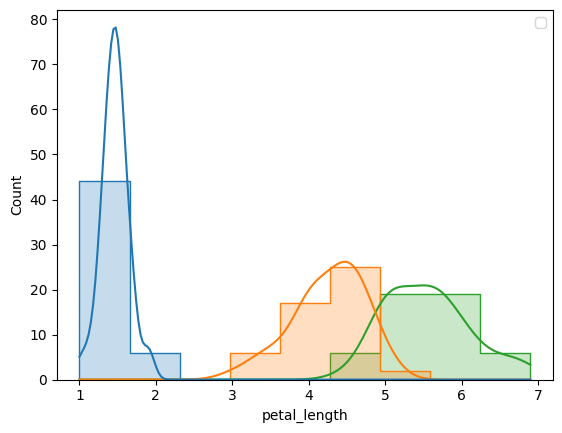

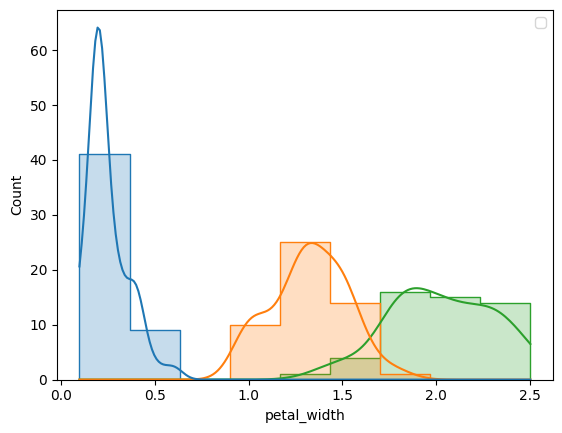

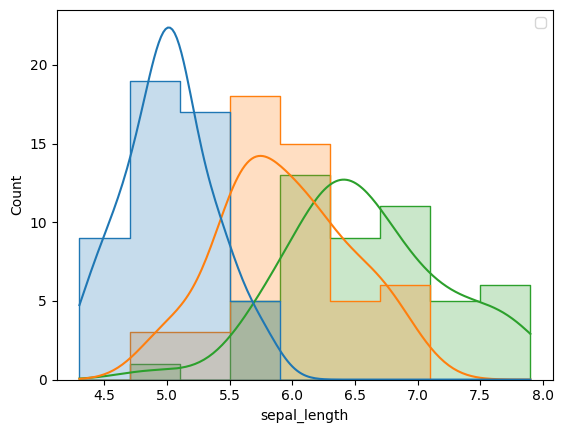

In [6]:
sns.histplot(data, x="petal_length", hue="species", element="step", common_norm=False, kde=True)
plt.legend()
plt.show()

# Create a histplot for petal_width
sns.histplot(data, x="petal_width", hue="species", element="step", common_norm=False, kde=True)
plt.legend()
plt.show()

# Create a histplot for sepal_length
sns.histplot(data, x="sepal_length", hue="species", element="step", common_norm=False, kde=True)
plt.legend()
plt.show()

In [ ]:
data['species']=data['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,NaN
146,6.3,2.5,5.0,1.9,NaN
147,6.5,3.0,5.2,2.0,NaN
148,6.2,3.4,5.4,2.3,NaN


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

Text(0.5, 1.0, 'Petal Width')

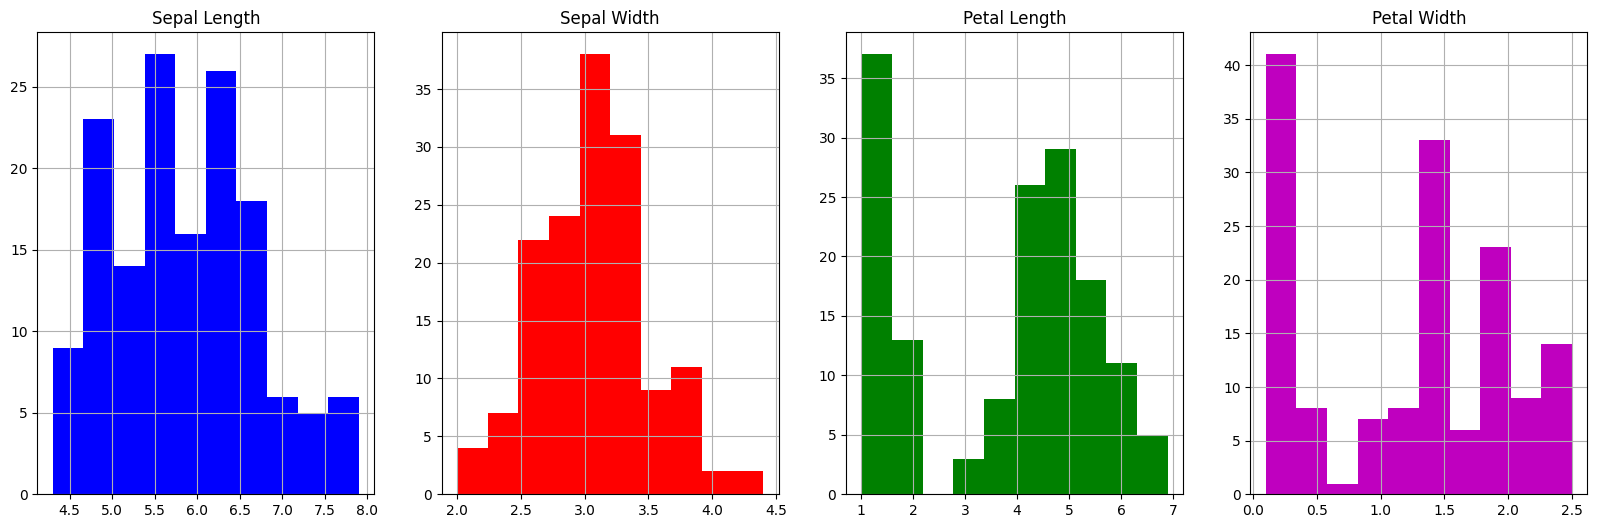

In [7]:
fig,axes=plt.subplots(1,4,figsize=(20,6))
data['sepal_length'].hist(ax=axes[0],color='b').set_title("Sepal Length")
data['sepal_width'].hist(ax=axes[1],color='r').set_title("Sepal Width")
data['petal_length'].hist(ax=axes[2],color='g').set_title("Petal Length")
data['petal_width'].hist(ax=axes[3],color='m').set_title("Petal Width")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**Logistic Regression**

In [ ]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
score=accuracy_score(y_pred,y_test)
score

1.0

In [ ]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

**Support Vector Machine**

---



In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
accuracy_score(y_test,pred)

1.0

In [ ]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

**Decision Tree**

---



In [ ]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)


1.0

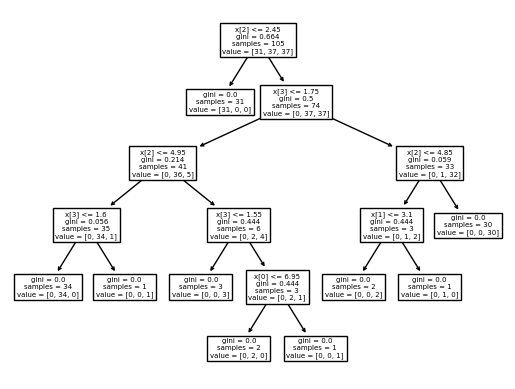

<Figure size 20000x800 with 0 Axes>

In [ ]:
tree.plot_tree(dt)

plt.show()

**K-Means Clustering**

---



In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

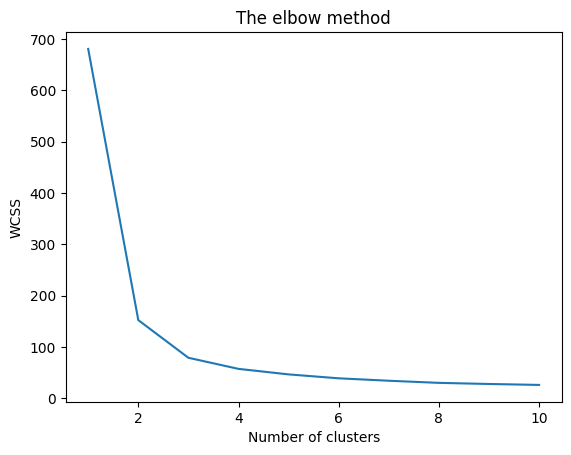

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

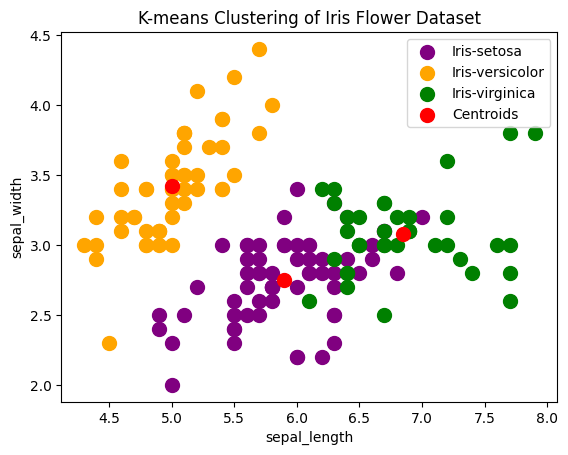

In [ ]:
plt.scatter(X.iloc[kmeans.labels_ == 0, 0], X.iloc[kmeans.labels_ == 0, 1], s=100, c='purple', label='Iris-setosa')
plt.scatter(X.iloc[kmeans.labels_ == 1, 0], X.iloc[kmeans.labels_ == 1, 1], s=100, c='orange', label='Iris-versicolor')
plt.scatter(X.iloc[kmeans.labels_ == 2, 0], X.iloc[kmeans.labels_ == 2, 1], s=100, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title("K-means Clustering of Iris Flower Dataset")
plt.legend()
plt.show()






